In [337]:
import pandas as pd

data = pd.read_csv (r"/Users/silviaserafini/ironhack/PROGETTI/SharksData/OUTPUT/sharks_clean.csv",encoding='latin-1')
df = pd.DataFrame(data)
display(df.head())
print(df.shape)


,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Sex,Injury,Time,Fatal,NotFatal,Species,Season
0,17,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,M,Minor injury to ankle,Afternoon,0,1,tiger,aut
1,14,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,F,Shallow lacerations to finger PROVOKED INCIDENT,unknown,0,1,blacktip,spr
2,37,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,M,"No injury, said to have been charged by sharks...",unknown,0,1,unknown,spr
3,38,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,M,"Minor injury, ankle grazed",unknown,0,1,wobbegong,spr
4,35,2018,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,M,Injuries to right leg & hand,Afternoon,0,1,small,spr


(5612, 14)


# Creation of 5 year bins

In [338]:
df["fiveYears"] = pd.cut(df.Year, bins=[1979,1984,1989,1994,1999,2004,2009,2014,2019],
                         labels=['1980-1984','1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2014','2015-2019'])



In [339]:

#display(df.head())
#df["fiveYears"].value_counts()

# Focus on Fatal vs not Fatal attacks  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


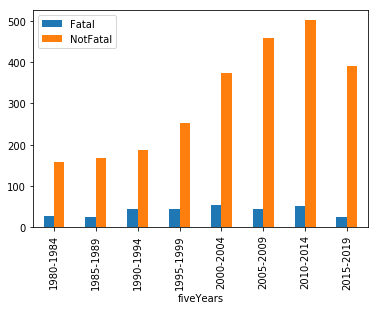

In [340]:
#cration of a temp database discarding 'unknown' values

#print(type(df.loc[(df["Fatal" ] != 'unknown')]))
temp=df[df["Fatal" ] != 'unknown']
temp["Fatal"]=pd.to_numeric(temp["Fatal"])
temp["NotFatal"]=pd.to_numeric(temp["NotFatal"])

#discard the old entries (early than 1970)
temp=temp[temp['Year'] > 1970]

#plot of the 'Fatal' and 'NotFatal' values group by 5 years bins
%matplotlib inline
temp.groupby("fiveYears").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar()



In [341]:
temp1=temp.groupby(["fiveYears"]).agg({"Fatal": "sum","NotFatal":"sum"})
temp1.describe()

,Fatal,NotFatal
count,8.000000,8.000000
mean,39.000000,311.000000
std,12.130246,137.054734
min,24.000000,157.000000
25%,25.750000,181.500000
50%,44.000000,313.000000
75%,46.000000,407.750000
max,53.000000,502.000000


# Take out 1

Take out: the highest number of reported Sharks attacks are in the bin 2010-2014,
with a maximum number of 53 Fatal and 502 not fatal attacks reported.

# Focus on type of attacks resulted in 'fatal' outcome

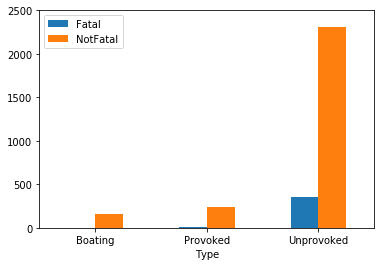

In [342]:

temp.groupby("Type").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar(rot=0, ylim=(0,2500))
#temp.head()

# Take out 2

Take Out: Sharks are Predator. Most of the "fatal" attacks are the result of "unprovocked" Sharcks attacks.

# Focus on the most dangerous species well represented in the data

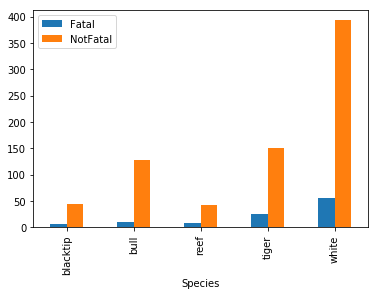

In [343]:
#I am considering only the top 5 most relevant species
top5s=temp['Species'].value_counts()[1:6].index
#temp2 is a temporal dataframe
temp2=temp[temp['Species'].isin(top5s)]
temp2.groupby("Species").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar()


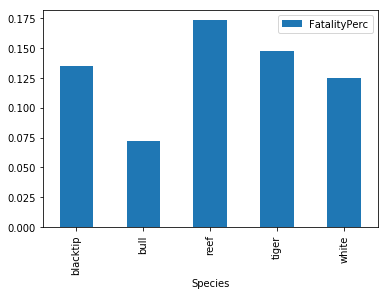

In [344]:
temp3=temp2.groupby('Species').agg({"Fatal": "sum","NotFatal": "sum"})
#calulation of the Fatality percentage
temp3['FatalityPerc']= temp3['Fatal'] / (temp3['Fatal'] + temp3['NotFatal'])
#plotting of the Fatality Percentage
temp3=temp3.reset_index().sort_values("FatalityPerc")

temp3.groupby('Species').agg({"FatalityPerc": "sum"}).plot.bar()

In [345]:
display(temp3.reset_index().sort_values('FatalityPerc',ascending=False))

,index,Species,Fatal,NotFatal,FatalityPerc
4,2,reef,9,43,0.173077
3,3,tiger,26,150,0.147727
2,0,blacktip,7,45,0.134615
1,4,white,56,393,0.124722
0,1,bull,10,128,0.072464


# Take out 3

 A white shark meeting represents the highest fatality probaility (~14%), followed by Blacktip and Reef shark.

# Focus on the most dangerous geagraphical areas and period of the year and day


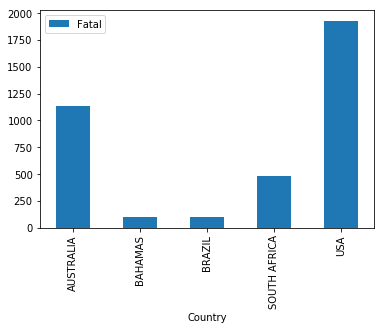

In [346]:
#filtering of the database keeping only the the top5 countries cases.
top5=temp['Country'].value_counts()[0:5].index

#creation of a filter to consider only the all-value-known entries of the top 5 countries
filter4=(df['Country'].isin(top5)) & (df["Season" ] != 'unk') & (df['Fatal'] !='unknown') & (df['NotFatal'] !='unknown')
temp4=df[filter4]


temp4.groupby("Country").agg({'Fatal': "count"}).plot.bar()



In [347]:
#focus on the most dangerous areas in USA and Australia

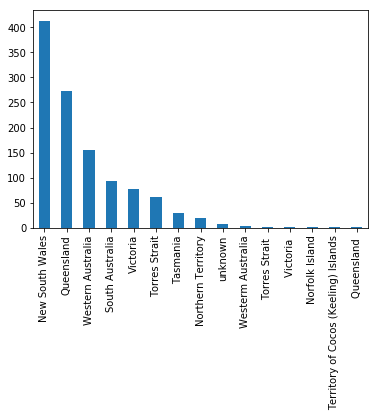

In [348]:
filter4_1=(df['Country'].isin(['USA','AUSTRALIA']))
temp4_1=df[filter4]
temp4_2=temp4_1[temp4_1['Country']=='AUSTRALIA']['Area'].value_counts().sort_values(ascending=False)
temp4_3=temp4_1[temp4_1['Country']=='USA']['Area'].value_counts().sort_values(ascending=False)

#Plot of the Australia areas
temp4_2.plot.bar()

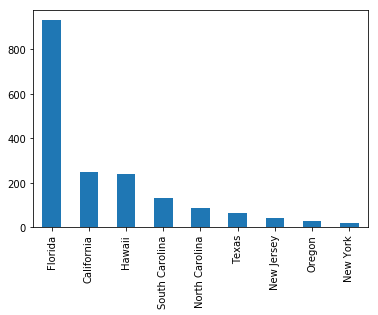

In [349]:
#plot of the USA areas 

temp4_3[temp4_3.values > 15].plot.bar()

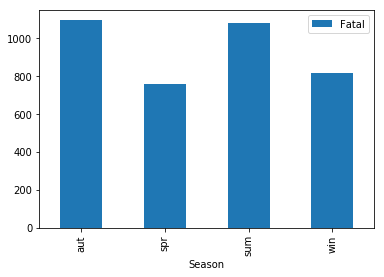

In [350]:
#plot of the n of attacke per season
temp4.groupby("Season").agg({'Fatal': "count"}).plot.bar()


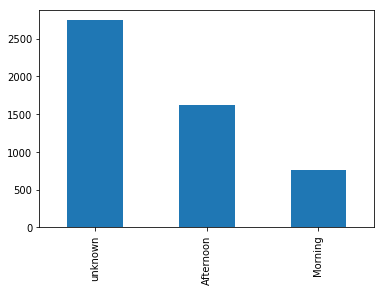

In [351]:
#plot of the time of the day
df['Time'].value_counts().plot.bar()

# Take out 4

USA followed by Australia during the European Summer and Autumn seasons are the most dangerous Countries (Highest fatality probability as a result of a shark attack). 

The highest n of attacks happend after 12h00.

The most dangerous areas in the USA are Florida, California, Hawaii and South Carolina.
The most dangerous areas in Australia are New South Wales, Queensland, Western Australia, South Australia.



# Where and when should I go to have the highest possibility to meet a shark?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A 

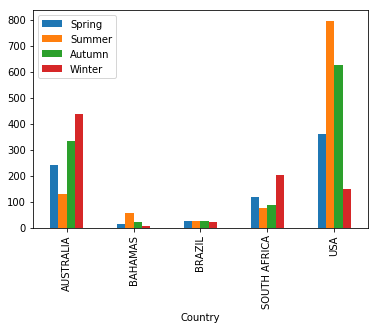

In [352]:

#Creation of 4 new column, one per season
temp4['Spring']=temp4['Season']=='spr'
temp4['Summer']=temp4['Season']=='sum'
temp4['Autumn']=temp4['Season']=='aut'
temp4['Winter']=temp4['Season']=='win'


#plots
temp4.groupby("Country").agg({'Spring': "sum",'Summer':'sum','Autumn':'sum','Winter':'sum'}).plot.bar()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

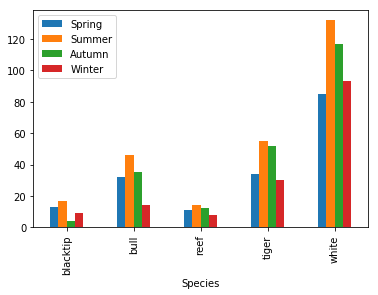

In [353]:

#creation of filter5 to consider only the top5 species of sharks.

filter5= filter4 & (df["Species"].isin(top5s))
temp5=df[filter5]

#creation of 4 columns: 1 per season
temp5['Spring']=temp5['Season']=='spr'
temp5['Summer']=temp5['Season']=='sum'
temp5['Autumn']=temp5['Season']=='aut'
temp5['Winter']=temp5['Season']=='win'

#plot
temp5.groupby("Species").agg({'Spring': "sum",'Summer':'sum','Autumn':'sum','Winter':'sum'}).plot.bar()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

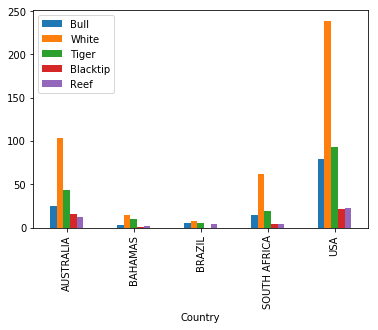

In [354]:
#creation of 5 columns: 1 per species
temp5['Blacktip']=temp5['Species']=='blacktip'
temp5['Bull']=temp5['Species']=='bull'
temp5['Reef']=temp5['Species']=='reef'
temp5['White']=temp5['Species']=='white'
temp5['Tiger']=temp5['Species']=='tiger'

#plot
temp5.groupby("Country").agg({'Bull': "sum",'White':'sum','Tiger':'sum','Blacktip':'sum','Reef':'sum'}).plot.bar()


In [355]:
temp5['Species'].value_counts()

white       427
tiger       171
bull        127
reef         45
blacktip     43
Name: Species, dtype: int64

In [356]:
#creation of indicesin order to understand where and when I can meet a specific speciesof shark

temp6=temp5.groupby("Country").agg({'Bull': "sum",'White':'sum','Tiger':'sum','Blacktip':'sum','Reef':'sum'})
temp7=temp5.groupby("Species").agg({'Spring': "sum",'Summer':'sum','Autumn':'sum','Winter':'sum'})

#normalization of the databases
temp6_norm=(temp6-temp6.min())/(temp6.max()-temp6.min())
temp7_norm=(temp7.T-temp7.T.min())/(temp7.T.max()-temp7.T.min())

display(temp7_norm)
display(temp6_norm)




Species,blacktip,bull,reef,tiger,white
Spring,0.692308,0.56250,0.500000,0.16,0.000000
Summer,1.000000,1.00000,1.000000,1.00,1.000000
Autumn,0.000000,0.65625,0.666667,0.88,0.680851
Winter,0.384615,0.00000,0.000000,0.00,0.170213


,Bull,White,Tiger,Blacktip,Reef
Country,,,,,
AUSTRALIA,0.289474,0.411255,0.443182,0.727273,0.476190
BAHAMAS,0.000000,0.030303,0.056818,0.045455,0.000000
BRAZIL,0.026316,0.000000,0.000000,0.000000,0.095238
SOUTH AFRICA,0.157895,0.233766,0.159091,0.181818,0.095238
USA,1.000000,1.000000,1.000000,1.000000,1.000000


# Take out 5

If you want to meet a shark you can go to:
    
    -USA in Autumn or Summer;
    -Australia in Autumn or Winter (European Seasons);
    -South Africa in Winter or Spring; 
    -the Bahamas during summer;
    -Brazil, any time.

If you want to meet a White shark you can go:
    
    -USA in Summer and Autumn;
    -Australia Autumn or Winter, or South Africa in Spring or Winter (European seasons).

If you want to meet a Blacktip shark you can go:

    -USA or Australia in Summer or Spring.
    
If you want to meet a Bull shark you can go:

    -USA or Australia in Summer or Spring.
    
If you want to meet a Reef shark you can go:
    
    -USA or Australia in Summer or Autumn.

If you want to meet a Tiger shark you can go:

    -USA in Summer and Autumn;
    -Australia Autumn or Winter, or Shouth Africa in Spring or Winter (European seasons).